<a href="https://en.wikipedia.org/wiki/Galindians" target="_blank"><img src="https://upload.wikimedia.org/wikipedia/commons/4/42/Flag_of_Widewuto.jpg" alt="IMAGE ALT TEXT HERE" width="480" border="10"/></a>

--------------------
galindia is a Jupyter notebook that provides some example code of how to combine phylogenies from [nextstrain.org](nextstrain.org) with baltic. This is still very much work in progress.

------------

Copyright 2017 [Gytis Dudas](https://twitter.com/evogytis). Licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/).


In [2]:
import imp
bt = imp.load_source('baltic', '/Users/evogytis/Documents/BLAB_baltic/baltic.py')

In [3]:
%%bash
## download nextstrain JSONs via scripts included in nextstrain's auspice (https://github.com/nextstrain/auspice)
auspath='/Users/evogytis/Documents/auspice' ## point to local copy of auspice 
cd $auspath;sh $auspath/scripts/get_data.sh ## run script to fetch JSONs

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   619  100   619    0     0   6677      0 --:--:-- --:--:-- --:--:--  6655
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   676  100   676    0     0  62252      0 --:--:-- --:--:-- --:--:-- 67600
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 55060  100 55060    0     0  2583k      0 --:--:-- --:--:-- --:--:-- 2688k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  341k  100  341k    0     0  1412k      0 --:--:-- --:--:-- --:--:-- 1418k
  % Total    % Received % Xferd  Average Speed   Tim

In [4]:
from IPython.display import HTML
import re
import copy

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects

import numpy as np

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

fname='/Users/evogytis/Documents/auspice/data/flu_h3n2_ha_12y_tree.json'
json_translation={'absoluteTime':'num_date','height':'xvalue','name':'clade'} ## allows baltic to find correct attributes in JSON, height and name are required at a minimum
json_meta={'file':fname.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org

ll=bt.loadJSON(fname,json_translation,json_meta) ## give loadJSON the name of the tree file, the translation dictionary and (optionally) the meta file

path='<iframe style="border: 0; width: 100%; height: 120px;" src="https://bandcamp.com/EmbeddedPlayer/track=2975389283/size=large/bgcol=333333/linkcol=e32c14/tracklist=false/artwork=small/transparent=true/" seamless><a href="http://marlonwilliams.bandcamp.com/track/vampire-again">Vampire Again by Marlon Williams</a></iframe>'

print 'Done!'
HTML(path)


Tree height: 0.056830
Tree length: 3.405340
annotations present

Numbers of objects in tree: 3861 (1771 nodes and 2090 leaves)

Done!


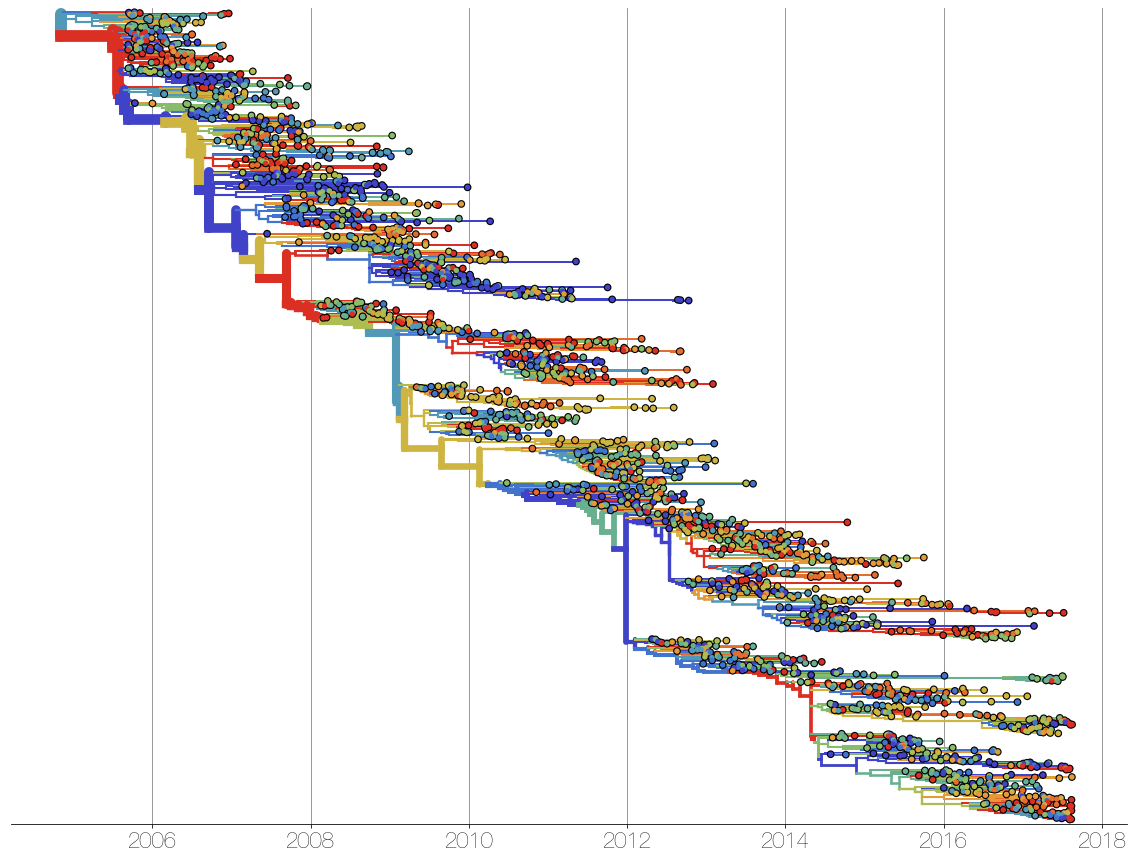

In [5]:
fig,ax = plt.subplots(figsize=(20,15),facecolor='w')

L=len([k for k in ll.Objects if k.branchType=='leaf'])

for k in ll.Objects: ## iterate over objects in tree
    x=k.absoluteTime ## or from x position determined earlier
    y=k.y ## get y position from .drawTree that was run earlier, but could be anything else
    
    xp=k.parent.absoluteTime ## get x position of current object's parent
    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x
        
    c='k'
    if k.traits.has_key(json_meta['traitName']):
        c=ll.cmap[k.traits[json_meta['traitName']]]
    
    branchWidth=2
    
    if k.branchType=='leaf': ## if leaf...
        s=30 ## tip size can be fixed
        
        ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
        ax.scatter(x,y,s=s*2,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath
    elif k.branchType=='node': ## if node...
        branchWidth+=10.0*len(k.leaves)/float(L)
        
        if len(k.children)==1:
            ax.scatter(x,y,facecolor=c,s=50,edgecolor='none',zorder=10,lw=2,marker='|') ## mark every node in the tree to highlight that it's a multitype tree
        ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=9,solid_capstyle='round')
        
    ax.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)
        
ax.set_ylim(-10,ll.ySpan+10)

ax.spines['top'].set_visible(False) ## no axes
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(axis='x',ls='-',color='grey')
ax.tick_params(axis='y',size=0)
ax.set_yticklabels([])

plt.show()

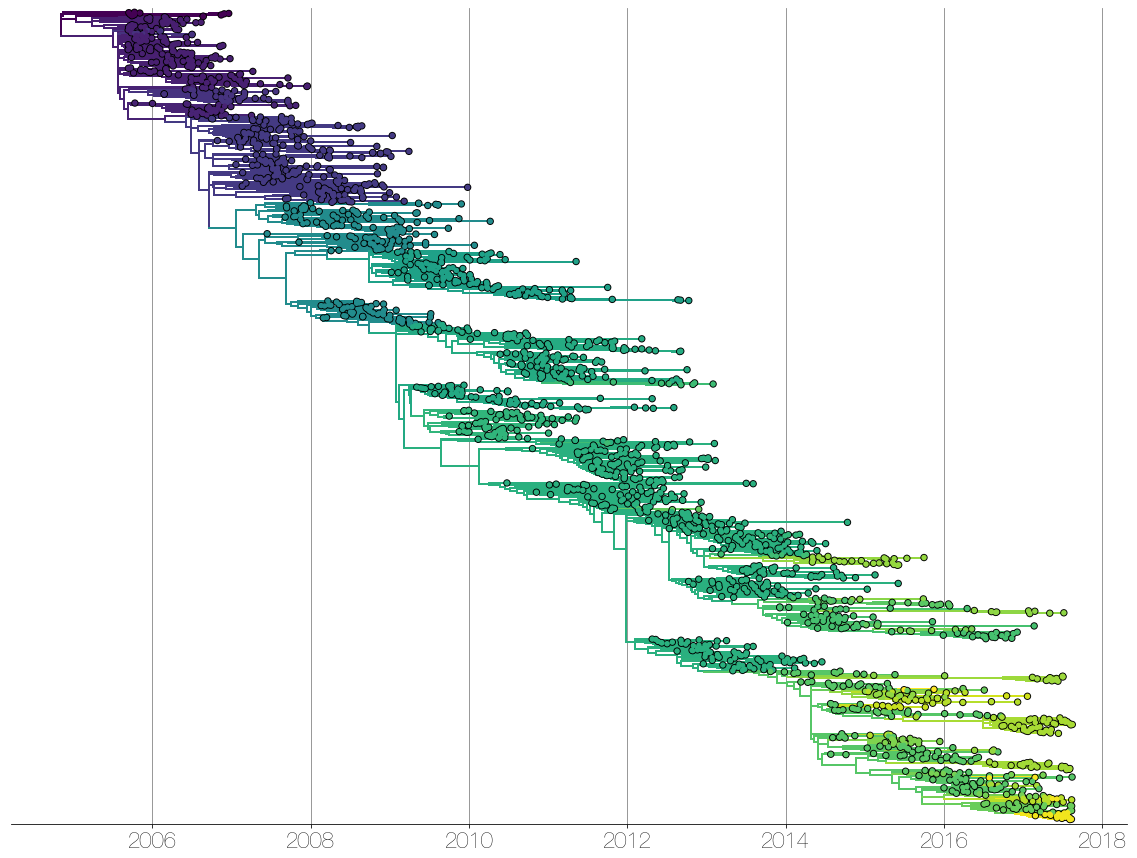

In [6]:
fig,ax = plt.subplots(figsize=(20,15),facecolor='w')

branchWidth=2 ## default branch width

continuousTrait='cTiter'
titers=[k.traits[continuousTrait] for k in ll.Objects]
norm=mpl.colors.Normalize(min(titers),max(titers))
cmap=mpl.cm.viridis

for k in ll.Objects: ## iterate over objects in tree
    x=k.absoluteTime ## or from x position determined earlier
    y=k.y ## get y position from .drawTree that was run earlier, but could be anything else
    
    xp=k.parent.absoluteTime ## get x position of current object's parent
    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x
        
    c='k'
    if k.traits.has_key(continuousTrait):
        c=cmap(norm(k.traits[continuousTrait]))
        
    if k.branchType=='leaf': ## if leaf...
        s=30 ## tip size can be fixed
        
        ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
        ax.scatter(x,y,s=s+0.8*s,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath
    elif k.branchType=='node': ## if node...
        if len(k.children)==1:
            ax.scatter(x,y,facecolor=c,s=50,edgecolor='none',zorder=10,lw=2,marker='|') ## mark every node in the tree to highlight that it's a multitype tree
        ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=9)
        
    ax.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)
        
ax.set_ylim(-10,ll.ySpan+10)

ax.spines['top'].set_visible(False) ## no axes
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(axis='x',ls='-',color='grey')
ax.tick_params(axis='y',size=0)
ax.set_yticklabels([])

plt.show()

In [7]:
branchWidth=2
tipSize=30
traitName='region'
ll.root.traits[traitName]='ancestor' ## add fake trait to root of the tree
loc_states=set([k.traits[traitName] for k in ll.Objects]+['ancestor'])
#tree_strings={loc:[] for loc in loc_states}
loc_trees={loc:[] for loc in loc_states}

for l in ll.Objects:
    k=l
    kp=l.parent
    
    ## get current node's and its parent's trait states
    kloc=k.traits[traitName]
    if k.parent.traits.has_key(traitName):
        kploc=kp.traits[traitName]
        kpc=kploc
    else:
        kploc='ancestor'
        kpc='ancestor'

    kc=kloc
    
    ## if states do not match
    if kc!=kpc:
        proceed=False
          
        if isinstance(k,bt.leaf) or k.branchType=='leaf': ## if dealing with a leaf - proceed
            N_children=1
            proceed=True
        else:
            N_children=len(k.leaves)
            if [ch.traits[traitName] for ch in k.children].count(kc)>=1: ## check if at least 1 child of a node is in the same state - proceed only if they are
                proceed=True
                
            print 'Both children within the same trait: %s (%s)'%(proceed,','.join([ch.traits[traitName] for ch in k.children]))

        if proceed==True:
            subtree=ll.subtree(k,traitName=traitName) ## this function returns a new baltic object that contains a trait-traversed subtree, starting from node k, for as long as the traversal stays within the trait value state of k
            
            #tree_strings[kc].append(subtree.toString()) ## remember subtree string, subtree object itself
            loc_trees[kc].append((kpc,k.parent.index,subtree))
            
print 'Done!'

Both children within the same trait: True (south_asia,north_america)
Both children within the same trait: True (china,north_america)
Both children within the same trait: True (europe,europe)
Both children within the same trait: True (europe,europe)
Both children within the same trait: True (europe,europe)
Both children within the same trait: True (west_asia,africa,west_asia)
Both children within the same trait: True (africa,africa)
Both children within the same trait: True (japan_korea,japan_korea,japan_korea)
Both children within the same trait: True (oceania,oceania,oceania)
Both children within the same trait: True (japan_korea,japan_korea,japan_korea)
Both children within the same trait: True (north_america,japan_korea,north_america)
Both children within the same trait: True (japan_korea,japan_korea)
Both children within the same trait: True (southeast_asia,southeast_asia)
Both children within the same trait: True (south_america,south_america)
Both children within the same trait: T

Both children within the same trait: True (china,china)
Both children within the same trait: True (japan_korea,japan_korea)
Both children within the same trait: True (japan_korea,japan_korea)
Both children within the same trait: True (europe,europe)
Both children within the same trait: True (europe,europe)
Both children within the same trait: True (japan_korea,japan_korea)
Both children within the same trait: True (west_asia,africa)
Both children within the same trait: True (west_asia,japan_korea)
Both children within the same trait: True (oceania,oceania)
Both children within the same trait: True (southeast_asia,japan_korea)
Both children within the same trait: True (south_asia,south_asia)
Both children within the same trait: True (oceania,oceania)
Both children within the same trait: True (southeast_asia,europe)
Both children within the same trait: True (japan_korea,oceania)
Both children within the same trait: True (japan_korea,north_america)
Both children within the same trait: Tru

Both children within the same trait: True (southeast_asia,southeast_asia)
Both children within the same trait: True (europe,oceania)
Both children within the same trait: True (china,europe,china,china)
Both children within the same trait: True (southeast_asia,southeast_asia)
Both children within the same trait: True (japan_korea,europe)
Both children within the same trait: True (japan_korea,japan_korea)
Both children within the same trait: True (southeast_asia,north_america)
Both children within the same trait: True (japan_korea,north_america)
Both children within the same trait: True (west_asia,north_america)
Both children within the same trait: True (japan_korea,north_america)
Both children within the same trait: True (north_america,north_america,north_america)
Both children within the same trait: True (oceania,oceania)
Both children within the same trait: True (africa,africa,south_america,africa,africa,africa)
Both children within the same trait: True (south_america,south_america)
B

Both children within the same trait: True (north_america,north_america)
Both children within the same trait: True (oceania,north_america)
Both children within the same trait: True (japan_korea,japan_korea)
Both children within the same trait: True (southeast_asia,west_asia)
Both children within the same trait: True (japan_korea,oceania,europe,oceania,oceania,china)
Both children within the same trait: True (china,china,japan_korea,japan_korea,china,china)
Both children within the same trait: True (japan_korea,japan_korea)
Both children within the same trait: True (japan_korea,japan_korea)
Both children within the same trait: True (japan_korea,japan_korea)
Both children within the same trait: True (southeast_asia,southeast_asia)
Both children within the same trait: True (southeast_asia,southeast_asia)
Both children within the same trait: True (west_asia,west_asia)
Both children within the same trait: True (china,china)
Both children within the same trait: True (europe,europe)
Both child

In [8]:
cumulative_y=0
for loc in sorted(loc_states,key=lambda q:sum([sum([o.length for o in T[2].Objects]) for T in loc_trees[q]])): ## iterate over trait values
    for t,tr in enumerate(sorted(loc_trees[loc],key=lambda x:(-x[2].root.absoluteTime,len(x[2].Objects)))): ## iterate over extracted subtrees sorted according to their root height and their size
        origin,parent,loc_tree=tr ## get origin of subtree, subtree itself
        if len([ob for ob in loc_tree.Objects if isinstance(ob,bt.leaf)])>0: ## proceed only if there's at least one tip in subtree
            loc_tree.drawTree()
            for w in loc_tree.Objects: ## iterate over subtree
                w.traits['y']=w.y+cumulative_y

            cumulative_y+=max([x.y for x in loc_tree.Objects])+2 ## increment y displacement

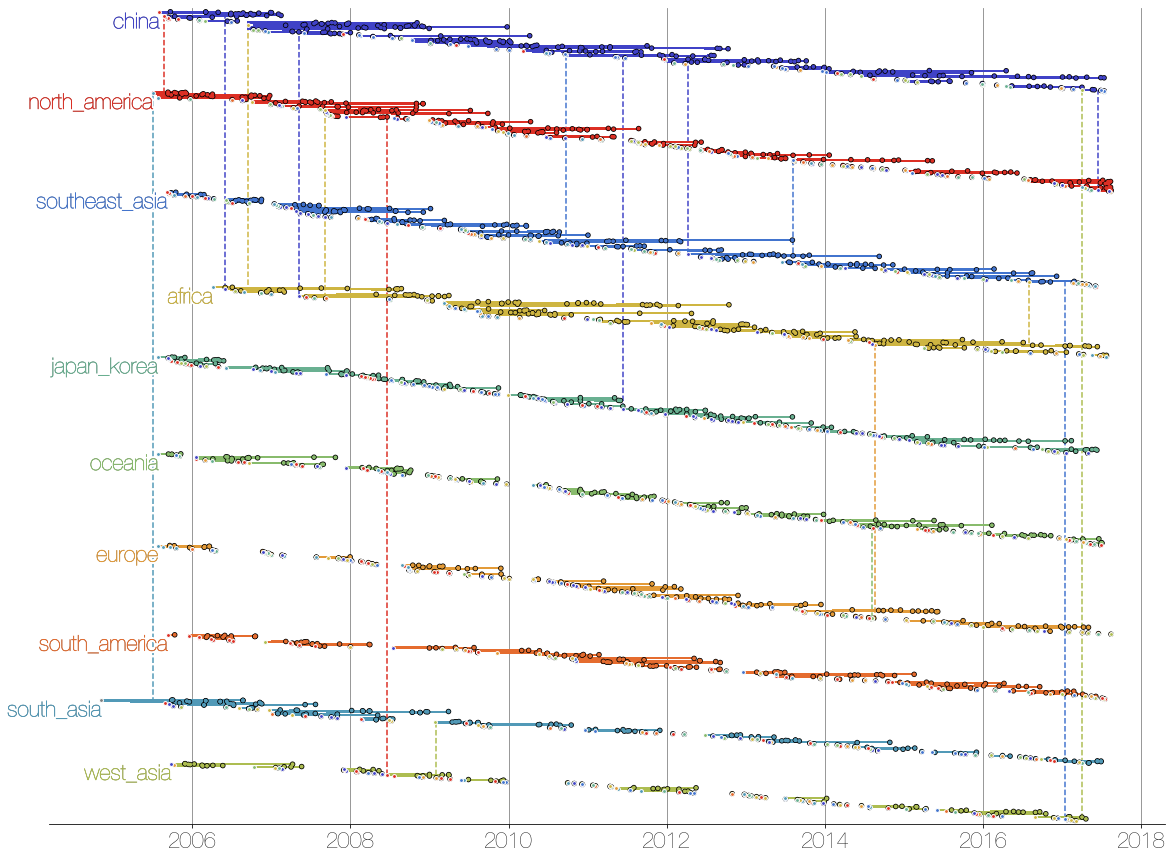

In [9]:
fig,ax = plt.subplots(figsize=(20,15),facecolor='w')

branchWidth=2
tipSize=15

mostRecentTip=max([k.absoluteTime for k in ll.Objects])
trunk=ll.reduceTree([k for k in ll.Objects if k.absoluteTime==mostRecentTip])
trunk_indices=[k.index for k in trunk.Objects]

cumulative_y=0
for loc in sorted(loc_states,key=lambda q:sum([sum([o.length for o in T[2].Objects]) for T in loc_trees[q]])): ## iterate over trait values
    
    fc='grey'
    if ll.cmap.has_key(loc):
        fc=ll.cmap[loc]

    effects=[path_effects.Stroke(linewidth=4, foreground='white'),
                 path_effects.Stroke(linewidth=0.5, foreground=fc)] ## black text, white outline

    for t,tr in enumerate(sorted(loc_trees[loc],key=lambda x:(-x[2].root.absoluteTime,len(x[2].Objects)))): ## iterate over extracted subtrees sorted according to their root height and their size
        origin,parent,loc_tree=tr ## get origin of subtree, subtree itself
        
        oriC='grey'
        if ll.cmap.has_key(origin):
            oriC=ll.cmap[origin]
        
        if len([ob for ob in loc_tree.Objects if isinstance(ob,bt.leaf)])>0: ## proceed only if there's at least one tip in subtree
            
            ## identify branch on the trunk
            if loc_tree.Objects[0].index in trunk_indices:
                for candidateTree in loc_trees[origin]:
                    if parent in [r.index for r in candidateTree[2].Objects]:
                        ax.plot([loc_tree.Objects[0].absoluteTime,loc_tree.Objects[0].absoluteTime],[loc_tree.Objects[0].y+cumulative_y,[r for r in candidateTree[2].Objects if r.index==parent][-1].traits['y']],ls='--',color=oriC)
            
            if t==len(loc_trees[loc])-1:
                ax.text(loc_tree.Objects[0].absoluteTime,loc_tree.Objects[0].y+cumulative_y,'%s'%(loc),ha='right',va='top',path_effects=effects)
            
            for w in loc_tree.Objects: ## iterate over subtree
                if w.traits[traitName]=='ancestor':
                    c='grey'
                else:
                    c=ll.cmap[w.traits[traitName]]
                y=w.y+cumulative_y
                x=w.absoluteTime
                if y!=None:

                    if w.parent!=None:
                        xp=w.parent.absoluteTime
                        yp=w.parent.y
                    else:
                        xp=x
                        yp=y+cumulative_y

                    if isinstance(w,bt.leaf): ## if leaf - plot tip circle
                        ax.scatter(x,y,s=tipSize,facecolor=c,edgecolor='none',zorder=100)
                        ax.scatter(x,y,s=tipSize*2,facecolor='k',edgecolor='none',zorder=99)

                    elif isinstance(w,bt.node): ## if node - plot vertical bar
                        yl=w.children[0].y+cumulative_y
                        yr=w.children[-1].y+cumulative_y
                        
                        ax.plot([x,x],[yl,yr],color=c,lw=branchWidth,zorder=98) ## plot vertical bar
                        
                    ax.plot([x,xp],[y,y],color=c,lw=branchWidth,zorder=98) ## plot branch

            if loc_tree.Objects[0].absoluteTime==None:
                oriX=loc_tree.Objects[0].absoluteTime
                oriY=loc_tree.Objects[0].y+cumulative_y
            else:
                oriX=loc_tree.Objects[0].parent.absoluteTime
                oriY=loc_tree.Objects[0].y+cumulative_y

            ax.scatter(oriX,oriY,15,facecolor=oriC,edgecolor='w',lw=1,zorder=200) ## add big circle at base of tree to indicate origin

            cumulative_y+=max([x.y for x in loc_tree.Objects])+2 ## increment y displacement

ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

ax.grid(axis='x',ls='-',color='grey')
ax.tick_params(axis='y',size=0)
ax.set_yticklabels([])
ax.set_ylim(-15,cumulative_y+15)

plt.show()

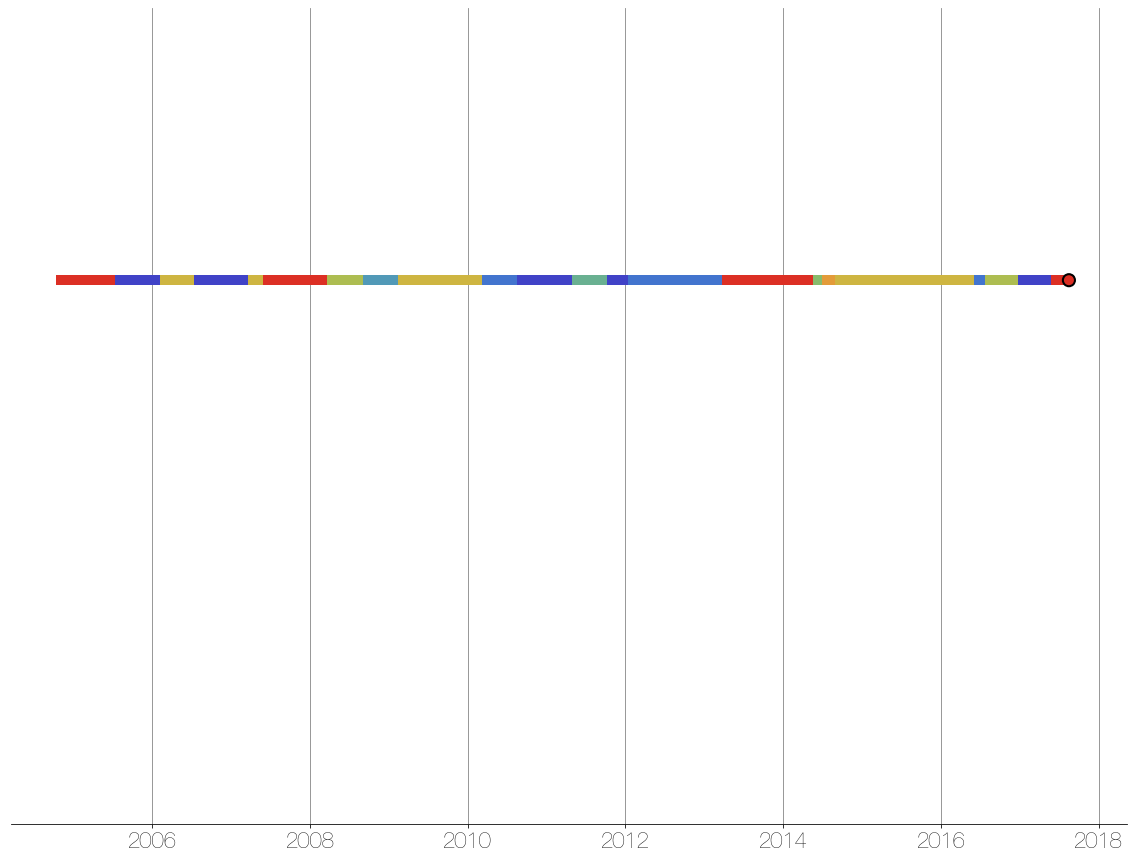

In [10]:
fig,ax = plt.subplots(figsize=(20,15),facecolor='w')

L=len([k for k in trunk.Objects if k.branchType=='leaf'])

for k in trunk.Objects: ## iterate over objects in tree
    x=k.absoluteTime ## or from x position determined earlier
    y=k.y ## get y position from .drawTree that was run earlier, but could be anything else
    
    xp=k.parent.absoluteTime ## get x position of current object's parent
    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x
        
    c='k'
    if k.traits.has_key(json_meta['traitName']):
        c=ll.cmap[k.traits[json_meta['traitName']]]
    
    branchWidth=10
    
    if k.branchType=='leaf': ## if leaf...
        s=100 ## tip size can be fixed
        
        ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
        ax.scatter(x,y,s=s*2,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath
    elif k.branchType=='node': ## if node...
        branchWidth+=0.0*len(k.leaves)/float(L)
        
#         if len(k.children)==1:
#             ax.scatter(x,y,facecolor=c,s=50,edgecolor='none',zorder=10,lw=2,marker='|') ## mark every node in the tree to highlight that it's a multitype tree
        ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=9,solid_capstyle='round')
        
    ax.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)
        
ax.set_ylim(-1,trunk.ySpan+1)

ax.spines['top'].set_visible(False) ## no axes
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(axis='x',ls='-',color='grey')
ax.tick_params(axis='y',size=0)
ax.set_yticklabels([])

plt.show()